In [1]:
#Install all necessary packages
!pip install scikit-learn


In [2]:

!pip install pandas scikit-learn matplotlib seaborn


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
#Loading dataset
import pandas as pd
df = pd.read_csv('data1.csv')

In [5]:

print(df.head())

                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                

In [6]:
# Checking for  missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64


In [7]:
#  Spliting features and labels
# Assuming column 'Label' is the target
X = df.iloc[:, :-1]   # Features
y = df.iloc[:, -1]    # Labels

In [8]:
# Import --> train_test_split function(sklearn)
from sklearn.model_selection import train_test_split

#train/test/splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Import --> DecisionTreeClassifier( scikit-learn)
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Assuming X_train contains the URL column that's causing the issue
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

#Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' 
)

# Applying preprocessing
X_train_processed = preprocessor.fit_transform(X_train)

# DTM ( processed data)
model = DecisionTreeClassifier()
model.fit(X_train_processed, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [10]:
#Importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier 

#  training and test data
X_train = ["your", "training", "text", "data", "here"]  # Replace with your actual training data
y_train = [0, 1, 0, 1, 0]  # Replace with your actual training labels
X_test = ["your", "test", "text", "data"]  # Replace with your actual test data

# Create and fit the vectorizer on training data only
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)  

#  model training (vectorized training data)
model = DecisionTreeClassifier() 
model.fit(X_train_vectorized, y_train)


X_test_vectorized = vectorizer.transform(X_test)  

y_pred = model.predict(X_test_vectorized)


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
import numpy as np

X = np.random.rand(100, 4)  
y = np.random.randint(0, 2, 100)
# Spliting into  training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# training
trained_model = RandomForestClassifier(n_estimators=100, random_state=42)
trained_model.fit(X_train, y_train)
# Evaluating
model = trained_model  
test_features = X_test  
test_labels = y_test   

y_pred = model.predict(test_features)

print("\nAccuracy:", accuracy_score(test_labels, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(test_labels, y_pred))
print("\nClassification Report:\n", classification_report(test_labels, y_pred))


Accuracy: 0.43333333333333335

Confusion Matrix:
 [[10  4]
 [13  3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.71      0.54        14
           1       0.43      0.19      0.26        16

    accuracy                           0.43        30
   macro avg       0.43      0.45      0.40        30
weighted avg       0.43      0.43      0.39        30



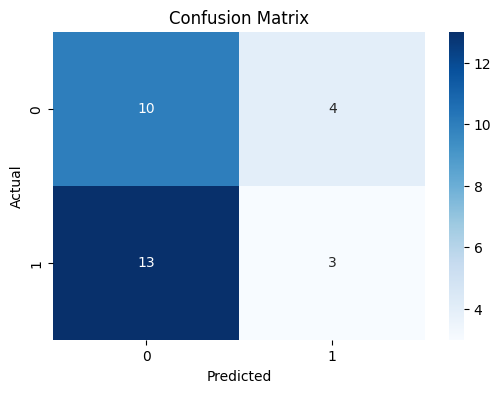

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# confusion matrix visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

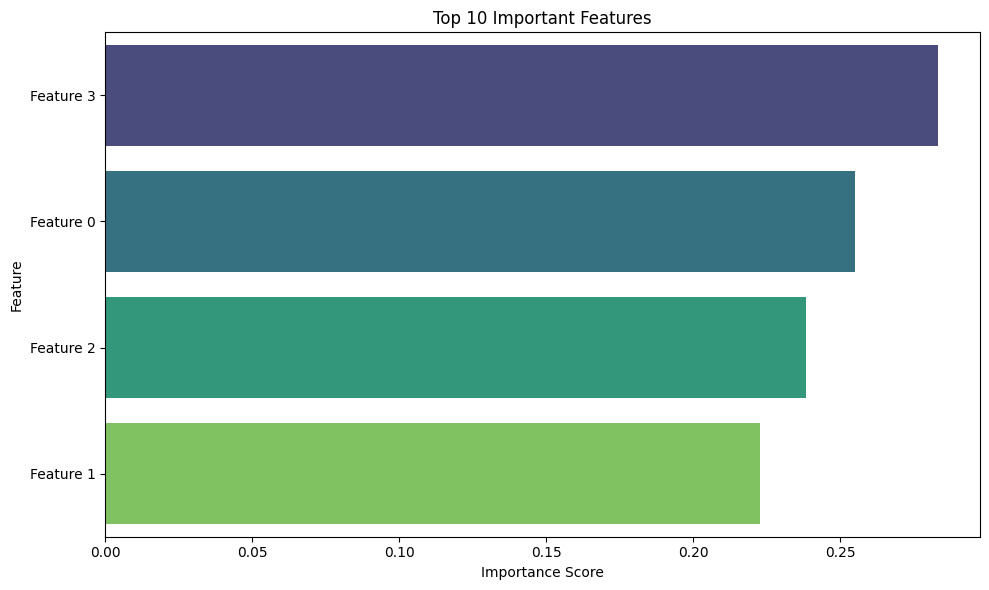

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feature_names = X.columns if not isinstance(X, np.ndarray) else [f'Feature {i}' for i in range(X.shape[1])]

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', legend=False,
            data=feat_imp_df.head(10), palette='viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
REAL TIME EVLUATION.


In [14]:
import pandas as pd
import re
from urllib.parse import urlparse

df = pd.read_csv("DATA.csv")
print(" Loaded DATA.csv. Shape:", df.shape)
print(" Columns:", df.columns.tolist())

def extract_features(url):
    parsed = urlparse(url)
    return {
        "length_url": len(url),
        "nb_dots": url.count('.'),
        "nb_subdomains": len(parsed.netloc.split('.')) - 2 if len(parsed.netloc.split('.')) > 2 else 0,
        "has_https": 1 if parsed.scheme == "https" else 0
    }

features = df["URL"].apply(extract_features)
feature_df = pd.DataFrame(features.tolist())

df = pd.concat([feature_df, df["Label"]], axis=1)
print(" Features extracted. New shape:", df.shape)


 Loaded DATA.csv. Shape: (642, 2)
 Columns: ['URL', 'Label']
 Features extracted. New shape: (642, 5)


In [15]:
print(df.columns.tolist())#printing column we have ,n just check

['length_url', 'nb_dots', 'nb_subdomains', 'has_https', 'Label']


In [16]:


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

feature_columns = ['length_url', 'nb_dots', 'nb_subdomains', 'has_https']
X = df[feature_columns]
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

accuracy = accuracy_score(y_test, model.predict(X_test))
print(f" Decision Tree trained. Accuracy: {accuracy:.2%}")

joblib.dump(model, "decision_tree_model.pkl")
print(" Model saved as decision_tree_model.pkl")


 Decision Tree trained. Accuracy: 95.35%
 Model saved as decision_tree_model.pkl


In [17]:
import pandas as pd
import joblib
from urllib.parse import urlparse

def extract_features(url):
    parsed = urlparse(url)
    return {
        "length_url": len(url),
        "nb_dots": url.count('.'),
        "nb_subdomains": len(parsed.netloc.split('.')) - 2 if len(parsed.netloc.split('.')) > 2 else 0,
        "has_https": 1 if parsed.scheme == "https" else 0
    }

eval_df = pd.read_csv("DATA.csv")
print(" Loaded DATA.csv. Shape:", eval_df.shape)

eval_features = eval_df["URL"].apply(extract_features)
eval_processed = pd.DataFrame(eval_features.tolist())

model = joblib.load("decision_tree_model.pkl")

predictions = model.predict(eval_processed)

eval_df['prediction'] = predictions
eval_df.to_csv("eval_with_predictions.csv", index=False)
print(" Predictions saved to eval_with_predictions.csv")


 Loaded DATA.csv. Shape: (642, 2)
 Predictions saved to eval_with_predictions.csv
